In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
deliveries_data=pd.read_csv("../input/kxip-vs-rr/deliveries.csv")
deliveries_data.head()
deliveries_data.info()
import os
print(os.listdir("../input"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [3]:
matches_data=pd.read_csv("../input/kxip-vs-rr/matches.csv")
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [4]:
kxip_vs_rr=matches_data[['id','team1','team2','winner','result','toss_winner','toss_decision','season']]
kxip_vs_rr=kxip_vs_rr[(kxip_vs_rr['team1']=='Kings XI Punjab') & (kxip_vs_rr['team2'] == 'Rajasthan Royals') | (kxip_vs_rr['team1']=='Rajasthan Royals') & (kxip_vs_rr['team2'] == 'Kings XI Punjab')]
kxip_vs_rr

,id,team1,team2,winner,result,toss_winner,toss_decision,season
64,65,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,normal,Kings XI Punjab,bat,2008
96,97,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,normal,Rajasthan Royals,field,2008
129,130,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,normal,Kings XI Punjab,bat,2009
144,145,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,normal,Kings XI Punjab,field,2009
192,193,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,normal,Kings XI Punjab,field,2010
211,212,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,normal,Kings XI Punjab,bat,2010
255,256,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,normal,Rajasthan Royals,field,2011
310,311,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,normal,Kings XI Punjab,field,2012
353,354,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,normal,Rajasthan Royals,bat,2012
397,398,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,normal,Rajasthan Royals,field,2013


In [6]:
Results=kxip_vs_rr['winner'].value_counts()
Results

Rajasthan Royals    10
Kings XI Punjab      9
Name: winner, dtype: int64

In [7]:
total_matches=kxip_vs_rr['id'].nunique()
total_matches

19

Text(0, 10, '10')

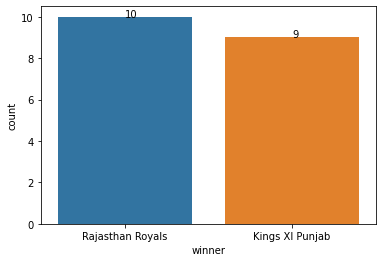

In [9]:
sns.countplot(kxip_vs_rr['winner'])

plt.text(1,9,str(9))
plt.text(0,10,str(10))

In [10]:
toss_results=kxip_vs_rr['toss_decision'].value_counts()
toss_results

field    14
bat       5
Name: toss_decision, dtype: int64

In [12]:
matches_played=pd.concat([matches_data['team1'],matches_data['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=matches_data['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)
matches_played.reset_index().head(8)


,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Delhi Capitals,177,84
4,Kings XI Punjab,176,82
5,Chennai Super Kings,164,77
6,Rajasthan Royals,147,75
7,Sunrisers Hyderabad,108,58


In [13]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage.head(8)

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Delhi Capitals                 47.5
Kings XI Punjab                46.6
Chennai Super Kings            47.0
Rajasthan Royals               51.0
Sunrisers Hyderabad            53.7
dtype: float64

In [14]:
total=matches_data.groupby('team1')['id'].count() + matches_data.groupby('team2')['id'].count()
total

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                 177
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
Name: id, dtype: int64

Text(0.5, 1.0, 'WIN PERCENTAGE BY TEAMS')

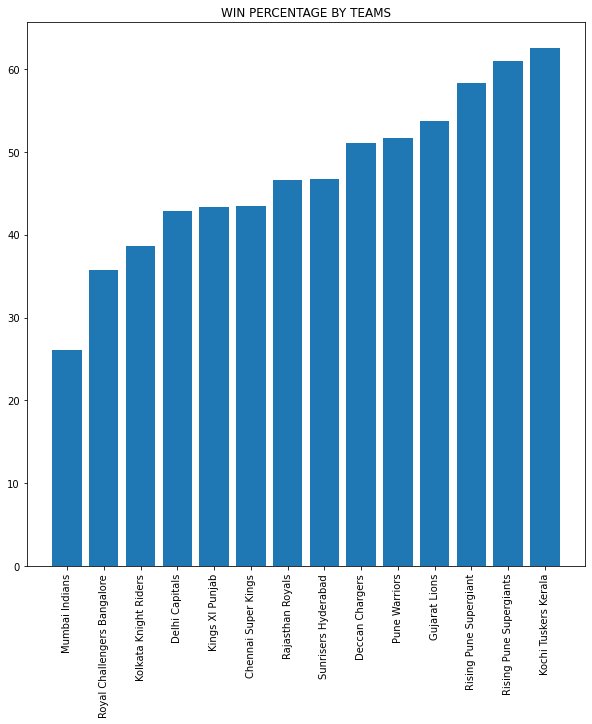

In [16]:
plt.figure(figsize=(10,10))
plt.bar(win_percentage.index,((matches_data['winner'].value_counts()/ total)*100).sort_values())
plt.xticks(rotation=90)
plt.title('WIN PERCENTAGE BY TEAMS')

In [17]:
last_3=kxip_vs_rr[kxip_vs_rr['season']>2016]
last_3['winner'].value_counts()

Kings XI Punjab     3
Rajasthan Royals    1
Name: winner, dtype: int64

Text(0, 3, '3')

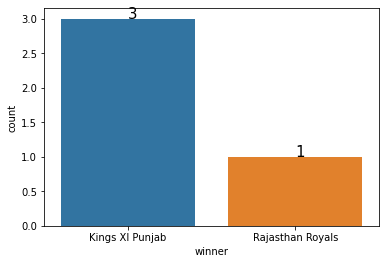

In [18]:
sns.countplot(last_3['winner'],data=last_3)
plt.text(1,1,str(1),fontsize=15)
plt.text(0,3,str(3),fontsize=15)

# QUES 2

In [31]:
batsman_data= deliveries_data[['match_id','bowling_team','batsman','batsman_runs','ball']]
batsman_data=batsman_data[(batsman_data['batsman'] == 'CH Gayle') | (batsman_data['batsman'] == 'KL Rahul')]
batsman_data=batsman_data[(batsman_data['bowling_team'] == 'Rajasthan Royals')]
batsman_data=batsman_data[(batsman_data['batsman_runs'] == 4) | (batsman_data['batsman_runs'] == 6)]
batsman_data 


,match_id,bowling_team,batsman,batsman_runs,ball
29155,126,Rajasthan Royals,CH Gayle,4,7
29169,126,Rajasthan Royals,CH Gayle,6,2
29170,126,Rajasthan Royals,CH Gayle,6,3
29182,126,Rajasthan Royals,CH Gayle,4,2
29183,126,Rajasthan Royals,CH Gayle,6,3
...,...,...,...,...,...
172350,11323,Rajasthan Royals,KL Rahul,4,2
172363,11323,Rajasthan Royals,KL Rahul,6,3
172368,11323,Rajasthan Royals,KL Rahul,4,1
172372,11323,Rajasthan Royals,KL Rahul,6,5


In [32]:
KXIP_runs_4or6=batsman_data.groupby('batsman').agg({'batsman_runs':'sum'})
KXIP_runs_4or6

,batsman_runs
batsman,
CH Gayle,314
KL Rahul,152


In [34]:
batsman_data= deliveries_data[['match_id','bowling_team','batsman','batsman_runs','ball']]
batsman_data=batsman_data[(batsman_data['batsman'] == 'CH Gayle') | (batsman_data['batsman'] == 'KL Rahul')]
batsman_data=batsman_data[(batsman_data['bowling_team'] == 'Rajasthan Royals')]
KXIP_total_runs_4or6=batsman_data.groupby('batsman').agg({'batsman_runs':'sum'})
KXIP_total_runs_4or6

,batsman_runs
batsman,
CH Gayle,430
KL Rahul,284


In [35]:
ratio_KXIP_Batsman=KXIP_runs_4or6/KXIP_total_runs_4or6
ratio_KXIP_Batsman

,batsman_runs
batsman,
CH Gayle,0.730233
KL Rahul,0.535211


In [36]:
batsman_data= deliveries_data[['match_id','bowling_team','batsman','batsman_runs','ball']]
batsman_data=batsman_data[(batsman_data['batsman'] == 'SV Samson') | (batsman_data['batsman'] == 'SPD Smith') | (batsman_data['batsman'] == 'RV Uthappa') | (batsman_data['batsman'] == 'JC Buttler')]
batsman_data=batsman_data[(batsman_data['bowling_team'] == 'Kings XI Punjab')]
batsman_data=batsman_data[(batsman_data['batsman_runs'] == 4) | (batsman_data['batsman_runs'] == 6)]
RR_runs_4or6=batsman_data.groupby('batsman').agg({'batsman_runs':'sum'})
RR_runs_4or6 


,batsman_runs
batsman,
JC Buttler,222
RV Uthappa,434
SPD Smith,108
SV Samson,188


In [37]:
batsman_data= deliveries_data[['match_id','bowling_team','batsman','batsman_runs','ball']]
batsman_data=batsman_data[(batsman_data['batsman'] == 'SV Samson') | (batsman_data['batsman'] == 'SPD Smith') | (batsman_data['batsman'] == 'RV Uthappa') | (batsman_data['batsman'] == 'JC Buttler')]
batsman_data=batsman_data[(batsman_data['bowling_team'] == 'Kings XI Punjab')]
RR_total_runs_4or6=batsman_data.groupby('batsman').agg({'batsman_runs':'sum'})
RR_total_runs_4or6 


,batsman_runs
batsman,
JC Buttler,348
RV Uthappa,722
SPD Smith,212
SV Samson,382


In [38]:
ratio_RR_Batsman=RR_runs_4or6/RR_total_runs_4or6
ratio_RR_Batsman

,batsman_runs
batsman,
JC Buttler,0.637931
RV Uthappa,0.601108
SPD Smith,0.509434
SV Samson,0.492147


# QUES 4

In [21]:
kxip_vs_rr_dot_balls= deliveries_data[['match_id','bowling_team','batting_team','total_runs','over','ball']]
kxip_vs_rr_dot_balls=kxip_vs_rr_dot_balls[(kxip_vs_rr_dot_balls['batting_team']=='Kings XI Punjab') & (kxip_vs_rr_dot_balls['bowling_team'] == 'Rajasthan Royals') | (kxip_vs_rr_dot_balls['batting_team']=='Rajasthan Royals') & (kxip_vs_rr_dot_balls['bowling_team'] == 'Kings XI Punjab')]
kxip_vs_rr_dot_balls


,match_id,bowling_team,batting_team,total_runs,over,ball
15040,65,Rajasthan Royals,Kings XI Punjab,0,1,1
15041,65,Rajasthan Royals,Kings XI Punjab,0,1,2
15042,65,Rajasthan Royals,Kings XI Punjab,0,1,3
15043,65,Rajasthan Royals,Kings XI Punjab,0,1,4
15044,65,Rajasthan Royals,Kings XI Punjab,1,1,5
...,...,...,...,...,...,...
172526,11323,Kings XI Punjab,Rajasthan Royals,0,20,2
172527,11323,Kings XI Punjab,Rajasthan Royals,2,20,3
172528,11323,Kings XI Punjab,Rajasthan Royals,2,20,4
172529,11323,Kings XI Punjab,Rajasthan Royals,2,20,5


In [23]:
#To count number of dot balls, Assigning 1 to ball if total runs are 0 in the ball column in data frame df4
kxip_vs_rr_dot_balls['ball'] = kxip_vs_rr_dot_balls['total_runs'].apply(lambda x: 1  if x== 0 else 0)
kxip_vs_rr_dot_balls



,match_id,bowling_team,batting_team,total_runs,over,ball
15040,65,Rajasthan Royals,Kings XI Punjab,0,1,1
15041,65,Rajasthan Royals,Kings XI Punjab,0,1,1
15042,65,Rajasthan Royals,Kings XI Punjab,0,1,1
15043,65,Rajasthan Royals,Kings XI Punjab,0,1,1
15044,65,Rajasthan Royals,Kings XI Punjab,1,1,0
...,...,...,...,...,...,...
172526,11323,Kings XI Punjab,Rajasthan Royals,0,20,1
172527,11323,Kings XI Punjab,Rajasthan Royals,2,20,0
172528,11323,Kings XI Punjab,Rajasthan Royals,2,20,0
172529,11323,Kings XI Punjab,Rajasthan Royals,2,20,0


In [24]:
dot_balls_by_teams=kxip_vs_rr_dot_balls.groupby('bowling_team').agg({'ball':'sum'})
dot_balls_by_teams

,ball
bowling_team,
Kings XI Punjab,777
Rajasthan Royals,833


In [25]:
# Total dot balls in RR VS KXIP:
dot_balls_by_KXIP_=777
dot_balls_by_RR=833

In [26]:
total_dot_balls=kxip_vs_rr_dot_balls['ball'].sum()
total_dot_balls


1610

In [27]:
dot_balls_per_match=total_dot_balls/total_matches
dot_balls_per_match

84.73684210526316

In [ ]:
#Hence dot balls comes out to be 85(round off) after analysing..

#  QUES 5

In [28]:
shami_stats= deliveries_data[['match_id','bowler','batting_team','total_runs','ball','over','player_dismissed']]
shami_stats=shami_stats[(shami_stats['batting_team'] == 'Rajasthan Royals') & (shami_stats['bowler'] == 'Mohammed Shami')]
shami_stats=shami_stats.fillna(0)
shami_stats['player_dismissed'] = shami_stats['player_dismissed'].apply(lambda x: 1  if x!= 0 else 0)
shami_stats

,match_id,bowler,batting_team,total_runs,ball,over,player_dismissed
91924,389,Mohammed Shami,Rajasthan Royals,0,1,2,0
91925,389,Mohammed Shami,Rajasthan Royals,1,2,2,0
91926,389,Mohammed Shami,Rajasthan Royals,1,3,2,0
91927,389,Mohammed Shami,Rajasthan Royals,2,4,2,0
91928,389,Mohammed Shami,Rajasthan Royals,1,5,2,0
...,...,...,...,...,...,...,...
172526,11323,Mohammed Shami,Rajasthan Royals,0,2,20,0
172527,11323,Mohammed Shami,Rajasthan Royals,2,3,20,0
172528,11323,Mohammed Shami,Rajasthan Royals,2,4,20,0
172529,11323,Mohammed Shami,Rajasthan Royals,2,5,20,0


In [30]:
import statistics as st
balls=[]#store the no. of balls until the first wicket occurs
ids=shami_stats['match_id'].unique()
for id in ids:
    ball=0
    for i in range(len(shami_stats)):
        if(shami_stats['match_id'].iloc[i]==id):
                ball+=1
                if(shami_stats['player_dismissed'].iloc[i]==1):
                    balls.append(ball)
                    break
                else:
                    continue
                
                
print(balls)
print("MEAN:",st.mean(balls))
print("MEDIAN:",st.median(balls))


[24, 22, 23, 13]
MEAN: 20.5
MEDIAN: 22.5
